<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Series" data-toc-modified-id="Series-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Series</a></span></li><li><span><a href="#DataFrame" data-toc-modified-id="DataFrame-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DataFrame</a></span></li><li><span><a href="#Part-1:-Loading-and-visualizing-Data" data-toc-modified-id="Part-1:-Loading-and-visualizing-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Part 1: Loading and visualizing Data</a></span></li></ul></div>

In [2]:
import pandas as pd
import numpy as np

# Pandas

## Series

In [3]:
s = pd.Series(np.random.randn(3), index = ['a','b','c']) # Series 必须是1维的

In [4]:
d = {'a':1, 'b':5, 'c':25, 'd':66}
s = pd.Series(d, index = ['a','b','c','d','e','f','d'])
'a':1 in d

SyntaxError: illegal target for annotation (<ipython-input-4-e0dd28f7c72c>, line 3)

In [ ]:
s1 = pd.Series(np.random.randn(10))
s2 = pd.Series(np.random.randn(10))
print(s1[1:],s2[:-1],s1[1:]+s2[:-1], s1 + s2)
(s1[1:]+s2[:-1]).dropna()
s.rename("Test")
print(s.name)

## DataFrame

In [ ]:
d = { "one" : pd.Series(np.random.randn(4),index=['a','b','c','d']),
      "two" : pd.Series(np.random.randn(4), index=['a','b','c','e']),
      "three" : pd.Series(np.random.randn(4), index=['f','b','c','e']),
    }

df = pd.DataFrame(d,index=['a','b','c','e'], columns=['one', 'two', 'three'])
print(df)

In [ ]:
print(df.index)
print(df.columns)

In [ ]:
d = np.random.randn(10,10)
df = pd.DataFrame(d)
print(df)
df[0]

In [ ]:
data = np.zeros((2,), dtype=[('A', 'i4'), ('B', 'f4'), ('C', 'a10')])
data[0][2] = "zhong hua ren ming"

In [ ]:
df = pd.DataFrame(data)
print(df)

In [ ]:
data2 = [{'a':6, 'b': 7, 'c':25 }, {'a':28, 'b':26}]
pd.DataFrame(data2)

In [ ]:
data = {       ('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
                ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
                ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
                ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
                ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}
        }
df1 = pd.DataFrame.from_dict(data, orient='index')
df2 = pd.DataFrame(data)
## 行跟列可以有若干个index
df1

In [ ]:
df2

In [ ]:
pd.DataFrame.from_records(data, index=[('a','c')])

In [ ]:
data = {'A': [1,2,3], 'B': [4,5,6]}
pd.DataFrame(data)

In [11]:
url = 'http://josephsalmon.eu/enseignement/TELECOM/MDI720/datasets/cars.csv'
data = pd.read_csv(url, index_col=0)
data.describe()

,speed,dist
count,50.000000,50.000000
mean,15.400000,42.980000
std,5.287644,25.769377
min,4.000000,2.000000
25%,12.000000,26.000000
50%,15.000000,36.000000
75%,19.000000,56.000000
max,25.000000,120.000000


In [25]:
speed = data['speed'].as_matrix();
dist = data['dist'].as_matrix();

In [31]:
speed_m = np.mean(speed)
dist_m = np.mean(dist)

theta1 =((speed - speed_m)*(dist - dist_m)).sum() / ((speed - speed_m)**2).sum()
theta0 = dist_m - theta1 * speed_m

In [32]:
(theta1, theta0)

(3.9324087591240882, -17.579094890510959)

# Jupyter Data Science Workflow
## Part 1: Loading and visualizing Data

In [77]:
from urllib.request import urlretrieve
urlretrieve(url, 'Fremont.csv') 

('Fremont.csv', <http.client.HTTPMessage at 0x18ebb0ba550>)

In [92]:
import pandas as pd
data = pd.read_csv("Fremont.csv", index_col='Date', parse_dates=True)
data.columns = ['West','East']
data['Total'] = data['East'] + data['West']
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


Index(['West', 'East', 'Total'], dtype='object')

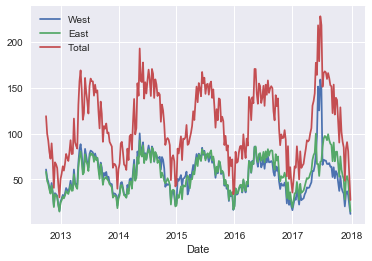

In [101]:
%matplotlib inline
data.resample('w').mean().plot()
data.columns

(0, 1059460.05)

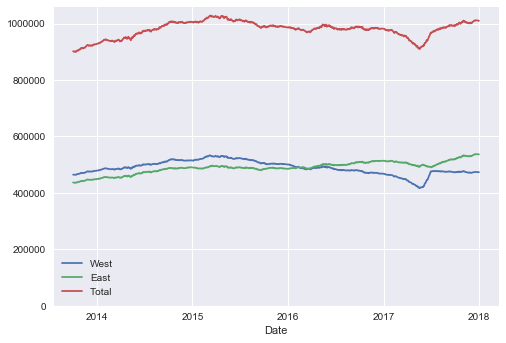

In [95]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None)

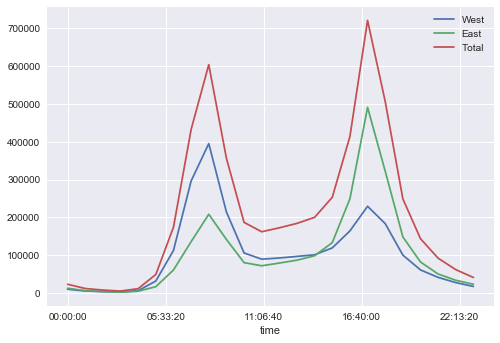

In [96]:
data.groupby(data.index.time).sum().plot()

In [98]:
pivoted = data.pivot_table('Total', index = data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


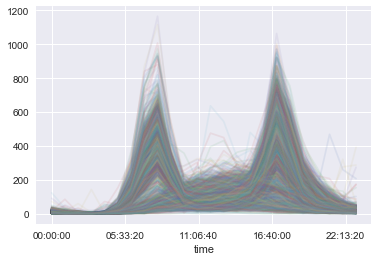

In [104]:
pivoted.plot(legend = False, alpha = 0.1)

In [116]:
url ='https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
data = pd.read_csv(url, index_col='Date')
%time pd.to_datetime(data.index)
data = pd.read_csv(url, index_col='Date')
%timeit pd.to_datetime(data.index, format="%m/%d/%Y %H:%M:%S %p")

Wall time: 12 s
216 ms ± 24.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Wall time: 219 ms


DatetimeIndex(['2012-10-03 12:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2017-12-31 02:00:00', '2017-12-31 03:00:00',
               '2017-12-31 04:00:00', '2017-12-31 05:00:00',
               '2017-12-31 06:00:00', '2017-12-31 07:00:00',
               '2017-12-31 08:00:00', '2017-12-31 09:00:00',
               '2017-12-31 10:00:00', '2017-12-31 11:00:00'],
              dtype='datetime64[ns]', name='Date', length=45984, freq=None)